# Chem 30324, Spring 2025, Homework 11


# Due May 3, 2025

## What to do with ethylene?
### Ethylene (C$_2$H$_4$) is an important commodity chemical. Partial oxidation to ethylene oxide (oxirane) is a useful way to introduce additional functionalization:

$$\text{C}_2\text{H}_4 \text{(g)} + \frac{1}{2} \text{O}_2 \text{(g)}\rightarrow \text{C}_2\text{H}_4\text{O}\text{(g)}$$

### At 500 K over an appropriate catalyst, the reaction is first-order in ethylene, half-order in O$_2$, zero order in products, and has a rate constant of 0.8 bar$^{-1/2}$ s$^{-1}$. You plan to study the reaction in an isothermal, contant pressure reactor, starting with a 20 mole % excess of ethylene ($n_\text{C2H4}/n_\text{O2} =1.2$) at 2 bar total pressure.

### 1. Draw the structure of ethylene oxide.

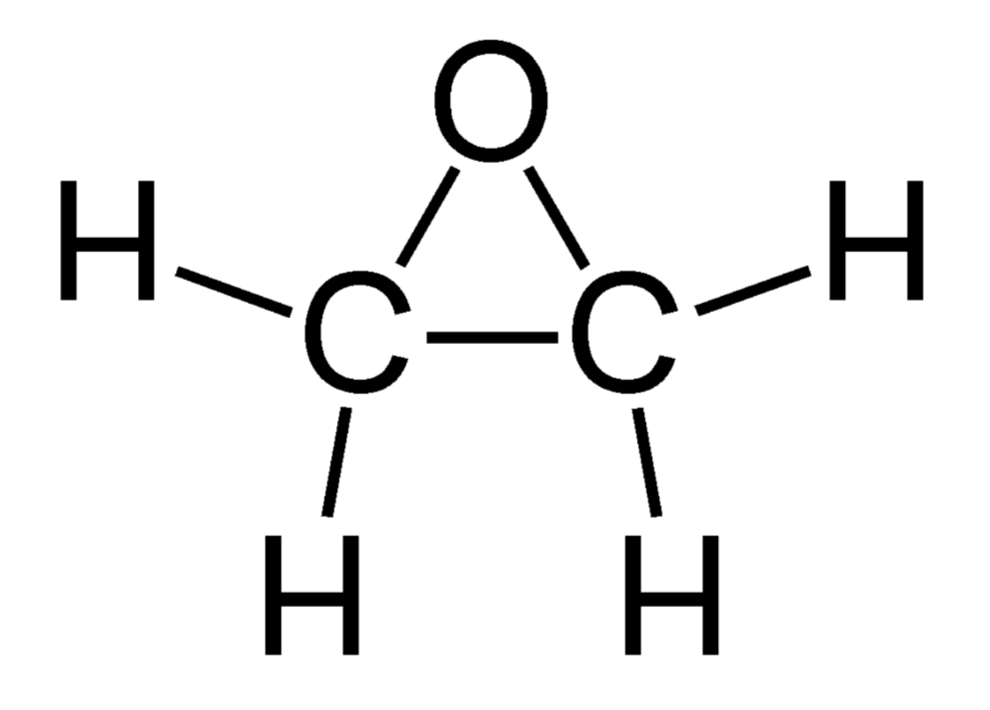

### 2. Is the reaction as written an elementary step? Why or why not?

No, elementary step are not supposed to have half molecule. Also the rate law is not consistent with stoichiometry.

### 3. Write down the rate law for the formation of ethylene oxide.

$r = k P_\text{ethylene} P_\text{oxygen}^\frac{1}{2}$

### 4. Create an ICE table for this reaction.  My advice is to create the table in terms of *moles* of species and an  advancement $\xi$.  What is the maximum possible value of $\xi$?

Choose basis of 1 mole O2 and 1.2 mole C2H6

|                     | $C_2H_4$             | $O_2$ | $C_2H_4O$ |
|:--------------------|---------------------:|-------------------------:|----------:|
| I     |      1.2   | 1  | 0 |
| C    |    $-\xi$     |    $-0.5\xi$           | $+\xi$ |
| E     |    1.2$-\xi$     |    1$- 0.5\xi$            | $\xi$ |  $\xi_{max} = 1 \rightarrow$ complete conversion of $O_2$

Maximum value of $\xi$ is 1.2. 

### 5. Define a conversion *X* as $\xi/\xi_\text{max}$, so $0 \le X \le 1$ Plot the partial pressures of all species vs $X$.  *Hint*: Recall the partial pressure is $P y_i$, and $y_i = N_i/N_\text{tot}$  from the ICE table.

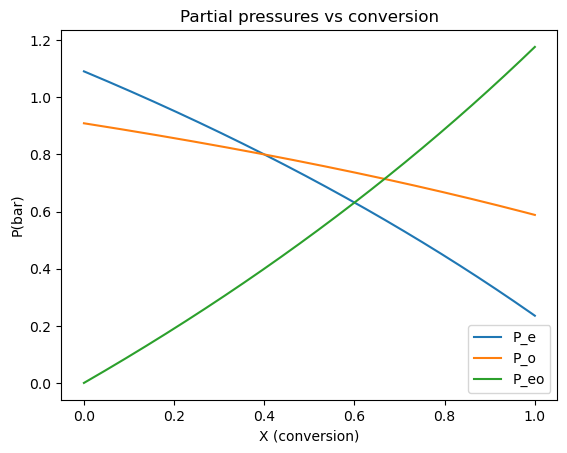

In [15]:
import numpy as np
import matplotlib.pyplot as plt

P = 2 # bar

xi = np.linspace(0,1.2,1000)
ximax = 1.2

X = xi/ximax

#Starting moles of reactants/product
n_e0 = 1.2
n_o0 = 1
n_eo0 = 0

#change in moles over time as a function of conversion
n_e = n_e0 - X
n_o = n_o0 - 0.5*X
n_eo = n_eo0 + X

#Keeping track of the total moles
Ntot = n_e + n_o + n_eo

#The molar fractions of each species
y_e = n_e /Ntot
y_o = n_o /Ntot
y_eo = n_eo /Ntot

#The Partial Pressure of each species
P_e = P*y_e
P_o = P*y_o
P_eo = P*y_eo

plt.plot(X,P_e,label='P_e')
plt.plot(X,P_o,label='P_o')
plt.plot(X,P_eo,label='P_eo')
plt.xlabel('X (conversion)')
plt.ylabel('P(bar)')
plt.title('Partial pressures vs conversion')
plt.legend()
plt.show()




### 6. Plot the forward reaction rate vs $X$. Be sure to include appropriate units.

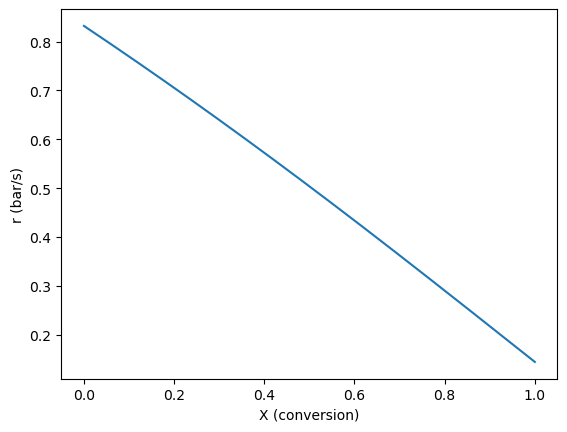

In [16]:
#Remember the reaction is first order in ethylene, half order in O2
k = 0.8
r = k*P_e*P_o**(1/2)
plt.plot(X,r)
plt.xlabel('X (conversion)')
plt.ylabel('r (bar/s)')
plt.show()

### 7. The apparent activation energy of the reaction is 60 kJ mol$^{-1}$.  What is the reaction prefactor? Include appropriate units.

In [17]:
import numpy as np
R = 8.314e-3 #kj/mol*K
Ea = 60 #kj/mol
T = 500 #K
k1 = 0.8 #bar^-0.5 * s^-1
A = k1/(np.exp(-Ea/R/T)) #bar^-0.5 * s^-1
print('Prefactor A is %.2f bar^(-0.5)*s^(-1)'%A)

Prefactor A is 1484134.21 bar^(-0.5)*s^(-1)


### 8. The apparent activation energy of the reaction is 60 kJ mol$^{-1}$.  Estimate the rate constant at 550 K.

In [18]:
k_550 = A*np.exp(-Ea/R/550)
print('rate constant at 550K is %.2f bar^(-0.5)*s^(-1)'%k_550)

rate constant at 550K is 2.97 bar^(-0.5)*s^(-1)


### 9. From the information given, can you predict the rate law for the reverse reaction?

No we can't predict the rate law. This is not an elementary step process so that we can't know the reaction order from the equation stoichiometry.

## Rate constants from scratch
### In 1996, Schneider and co-workers used quantum chemistry to compute the reaction pathway for unimolecular decomposition of trifluoromethanol, a reaction of relevance to the atmospheric degradation of hydrofluorocarbon refrigerants (*J. Phys. Chem.* **1996**, *100*, 6097- 6103, [doi:10.1021/jp952703m](https://pubs.acs.org/doi/abs/10.1021/jp952703m)):

$$\text{CF}_3\text{OH}\rightarrow \text{COF}_2 + \text{HF}$$
### Following are some of the reported results, computed at 298 K:

|                     | CF$_3$OH             | \[CF$_3$OH\]$^\ddagger$ | C(O)F$_2$ | HF |
|:--------------------|---------------------:|------------------------:|----------:|---:|
| $E^\text{elec}$ (Hartree)| -412.90047|-412.82771|-312.57028|-100.31885|
| ZPE (Hartree)| 0.02889| 0.02313| 0.01422 | 0.00925 |
| $U^\text{trans}$ (kJ mol$^{-1}$)| 3.7| 3.7   | 3.7| 3.7 |
| $U^\text{rot }$  (kJ mol$^{-1}$)| 3.7| 3.7   | 3.7| 2.5 |
| $U^\text{vib}$   (kJ mol$^{-1}$)| 4.3| 4.1   |1.2 | 0 |
| $q^{\text{trans}}/V$ (m$^{-3}$) | $7.72\times 10^{32}$ | $7.72\times 10^{32}$   |$1.59\times 10^{32}$ |$8.65\times 10^{31}$ |
| $q^\text{rot}$      | 61830                |  68420  | 679 | 9.59 |
| $q^\text{vib}$      | 2.33                 |  2.28  | 1.16 | 1 |

### 10. Provide a rough sketch of what you expect the transition state to look like.

![Problem 1](./HW11-10.png)

### 11. Based on the data in the table, create a potential energy surface for the unimolecular decomposition reaction. Indicate on the PES the location of the reactants, the products, and the transition state. Also indicate relevant zero point energies, the 0 K reaction energy, and the activation energy.

![Problem 11](./HW11-11.png)

### 12. Using data from the table and harmonic transition state theory, compute the  first-order rate constant for CF$_3$OH decomposition at 298 K, in s$^{-1}$.

In [19]:
import numpy as np

#Constants
kB=8.61734e-5 # eV/K
T1=298 # K
h=4.136e-15 # eV*s

q_TS= 7.72e32*68420*2.28 # 1/m^3, q(trans)*q(rot)*q(vib)

q_A=7.72e32*61830*2.33 # 1/m^3, q(trans)*q(rot)*q(vib)

delta_E= ((-412.82771+0.02313)-(-412.90047+0.02889))*27.212 # eV

k=kB*T1/h*q_TS/q_A*np.exp(-delta_E/kB/T1)
print("First-order rate constant for CF3OH decompostion at 298 K is %E s^-1."%k)

First-order rate constant for CF3OH decompostion at 298 K is 9.852726E-19 s^-1.


### 13. Based on your computed rate constant, what is the half-life of CF$_3$OH at 298 K?

In [20]:
t=np.log(2)/k # s
print('The half-life is %E s, which is about %E years.'%(t,t/3600/24/365))

The half-life is 7.035080E+17 s, which is about 2.230809E+10 years.


### 14. Experiments reveal that the CF$_3$OH comes to equilibrium far faster than the unimolecular rate would suggest. Provide a possible explanation for this observation (other than that Schneider calculations are incorrect!).

Must decompose by some other route!  Biomolecular processes, for instance. One proposed mechanism is the existence of H$_2$O lowers the activation energy of the decomposition of CF$_3$OH. The proposed reaction pathway is shown in J. Phys. Chem. 1996, 100, 6097- 6103.

![Problem 14](./HW11-14.png)